<a href="https://colab.research.google.com/github/rahulkhankar/SelfProject/blob/master/CAT_vs_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#import shutil
#shutil.unpack_archive("/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/dataset.zip", "/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/")

# Building the CNN

In [ ]:
# Importing the Keras libraries and packages
import keras
import keras.models as models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Initialising the CNN
nn = Sequential()

In [ ]:
# Convolution
nn.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Pooling
nn.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
nn.add(Conv2D(32, (3, 3), activation = 'relu'))
nn.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
nn.add(Conv2D(32, (3, 3), activation = 'relu'))
nn.add(MaxPooling2D(pool_size = (2, 2)))
# Flattening
nn.add(Flatten())
# Full connection
nn.add(Dense(units = 128, activation = 'relu'))
nn.add(Dropout(0.3))
nn.add(Dense(units = 128, activation = 'relu'))
nn.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
opt = keras.optimizers.Adam(learning_rate=0.001)
nn.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

print(nn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

# Fitting the CNN to the images

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True, zoom_range=0.25,rotation_range=10)


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8948 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1100 images belonging to 2 classes.


# Train again

In [ ]:
from pickle import dump,load

In [ ]:
train_loss=list()
train_acc=list()
val_acc=list()
val_loss=list()
history = nn.fit_generator(training_set,
                         steps_per_epoch = 2000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 1100 ,shuffle=True,verbose=1)
for i in history.history['accuracy']:
    train_acc.append(i)
for j in history.history['loss']:
    train_loss.append(j)
for i in history.history['val_accuracy']:
    val_acc.append(i)
for i in history.history['val_loss']:
    val_loss.append(i)
with open("/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/accuracy.txt", "w") as file:
    file.write(str(train_acc))
with open("/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/loss.txt", "w") as file:
    file.write(str(train_loss))
with open("/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/val_accuracy.txt", "w") as file:
    file.write(str(val_acc))
with open("/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/val_loss.txt", "w") as file:
    file.write(str(val_loss))

nn.save('/content/drive/My Drive/Colab Notebooks/Dataset/CNN.h5') 

Epoch 1/10
2000/2000 [==============================] - 756s 378ms/step - loss: 0.5700 - accuracy: 0.6887 - val_loss: 0.3543 - val_accuracy: 0.7920
Epoch 2/10
2000/2000 [==============================] - 735s 367ms/step - loss: 0.4326 - accuracy: 0.7959 - val_loss: 0.3663 - val_accuracy: 0.8084
Epoch 3/10
2000/2000 [==============================] - 727s 364ms/step - loss: 0.3731 - accuracy: 0.8319 - val_loss: 0.2504 - val_accuracy: 0.8292
Epoch 4/10
2000/2000 [==============================] - 729s 365ms/step - loss: 0.3371 - accuracy: 0.8515 - val_loss: 0.3264 - val_accuracy: 0.8364
Epoch 5/10
2000/2000 [==============================] - 725s 363ms/step - loss: 0.3087 - accuracy: 0.8664 - val_loss: 0.4973 - val_accuracy: 0.8164
Epoch 6/10
2000/2000 [==============================] - 721s 360ms/step - loss: 0.2847 - accuracy: 0.8768 - val_loss: 0.2581 - val_accuracy: 0.8299
Epoch 7/10
2000/2000 [==============================] - 722s 361ms/step - loss: 0.2650 - accuracy: 0.8860 - val_

# Load Model

In [ ]:
from keras.models import load_model

In [ ]:
nn = load_model('/content/drive/My Drive/Colab Notebooks/Dataset/CNN.h5')

# Plot loss and accuracy

In [ ]:
import matplotlib.pyplot as plt

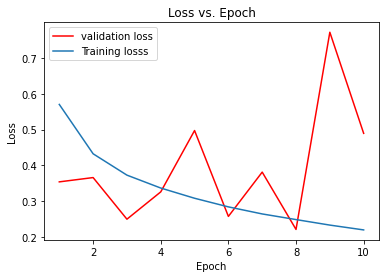

In [ ]:
def plot_loss(train_loss,val_loss):
    '''Function to plot the loss vs. epoch'''
    x = list(range(1, len(val_loss) + 1))
    plt.plot(x, val_loss, color = 'red', label = 'validation loss')
    plt.plot(x, train_loss, label = 'Training losss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    
plot_loss(train_loss,val_loss) 

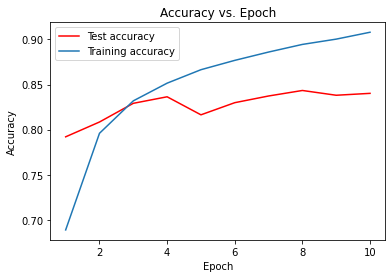

In [ ]:
def plot_accuracy(train_acc,val_acc):
    
    x = list(range(1, len(val_acc) + 1))
    plt.plot(x, val_acc, color = 'red', label = 'Test accuracy')
    plt.plot(x, train_acc, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    
plot_accuracy(train_acc,val_acc)

# Making new predictions

In [ ]:
#To Determine which label is for which category
label_map = training_set.class_indices 
print(label_map)

{'cats': 0, 'dogs': 1}


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/dataset/single_prediction/cat_or_dog_4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0) #Make dimension in the form (1,64*64)
result = nn.predict(test_image)
#training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [ ]:
prediction


'dog'

# Actual Image

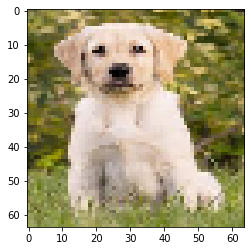

In [ ]:
import matplotlib.pyplot as plt
img = image.load_img('/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/dataset/single_prediction/cat_or_dog_4.jpg', target_size = (64, 64))
plt.imshow(img,cmap = 'gray')

In [ ]:
# load the model
# summarize feature map shapes
for i in range(len(nn.layers)):
	layer = nn.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

# Feature in Third convolution layer

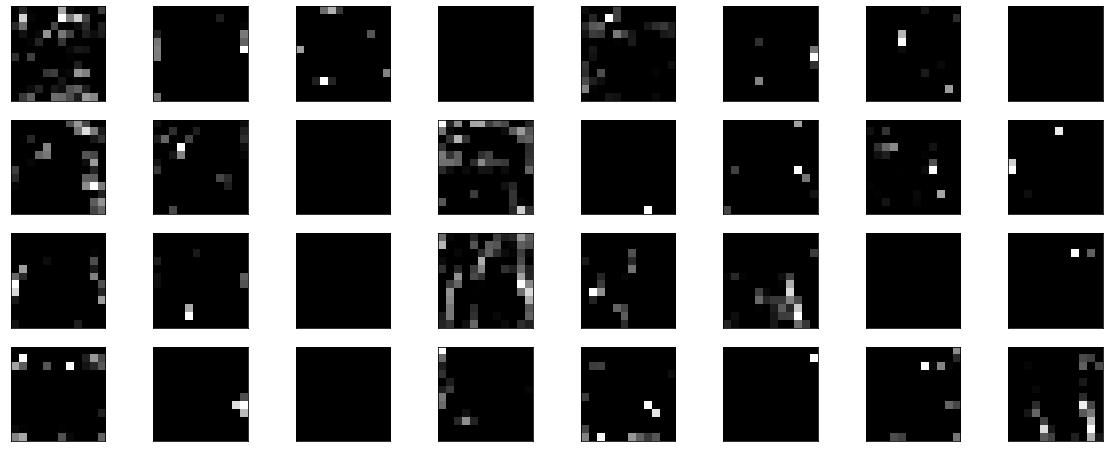

In [ ]:
# plot feature map of Third conv layer for given image
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# redefine model 
nn3 = Model(inputs=nn.inputs, outputs=nn.layers[4].output)

# load the image with the required shape
img = image.load_img('/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/dataset/single_prediction/cat_or_dog_4.jpg',target_size=(64, 64))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for third hidden layer
feature_maps = nn3.predict(img)
# plot all 64 maps in an 8x8 squares
length = 4
breadth = 8
ix = 1
fig = plt.figure(figsize=(20, 8))
for _ in range(length):
	for _ in range(breadth):
		# specify subplot and turn of axis
		ax = pyplot.subplot(length, breadth, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

# Feature in Second convolution layer

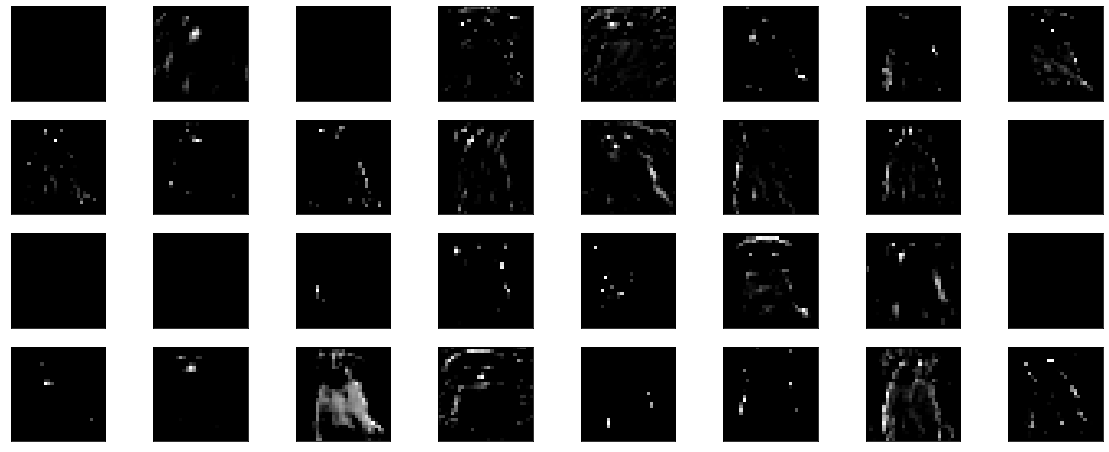

In [ ]:
# plot feature map of second conv layer for given image
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model

from numpy import expand_dims
# load the model

# redefine model to output right after the first hidden layer
nn2 = Model(inputs=nn.inputs, outputs=nn.layers[2].output)

# load the image with the required shape
img = image.load_img('/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/dataset/single_prediction/cat_or_dog_4.jpg',target_size=(64, 64))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = nn2.predict(img)
# plot all 64 maps in an 8x8 squares
length = 4
breadth = 8
ix = 1
fig = plt.figure(figsize=(20, 8))
for _ in range(length):
	for _ in range(breadth):
		# specify subplot and turn of axis
		ax = pyplot.subplot(length, breadth, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

# Feature in first convolution layer

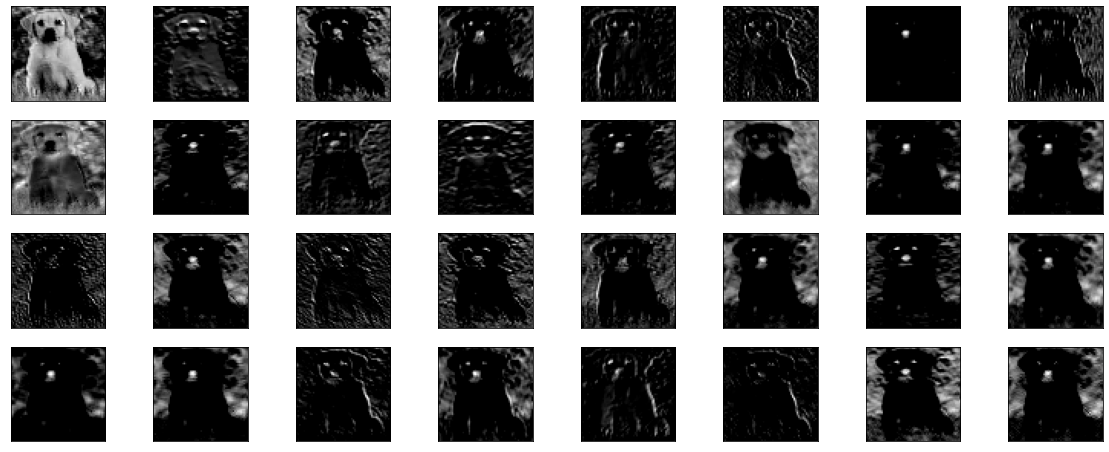

In [ ]:
# plot feature map of first conv layer for given image
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model

# redefine model to output right after the first hidden layer
nn0 = Model(inputs=nn.inputs, outputs=nn.layers[0].output)

# load the image with the required shape
img = image.load_img('/content/drive/My Drive/Colab Notebooks/Dataset/Cat vs dog/dataset/single_prediction/cat_or_dog_4.jpg',target_size=(64, 64))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = nn0.predict(img)
# plot all 32 maps
length = 4
breadth = 8
ix = 1
fig = plt.figure(figsize=(20, 8))
for _ in range(length):
	for _ in range(breadth):
		# specify subplot and turn of axis
		ax = pyplot.subplot(length, breadth, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()